Imports and definitions of functions to calculate relaxation rate constants

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

def J(omega,tau):
  return 2/5*tau/(1+(omega*tau)**2)

def T1(delta,sigmazzS,omegaI,omegaS,tau):
  return ((delta/4)**2*(1*J(omegaI-omegaS,tau)+3*J(omegaS,tau)+6*J(omegaI+omegaS,tau))+\
            3/4*(sigmazzS*omegaS)**2*J(omegaS,tau))**(-1)

def T1x(delta,omegaI,omegaS,tau):
  return ((delta/4)**2*(-1*J(omegaI-omegaS,tau)+6*J(omegaI+omegaS,tau)))**(-1)

Define constants

In [2]:
gammaH = 26.7522128e7               #rad / s / T
gammaN = -2.7116e7                  #rad / s / T
omegaS = 14.1*gammaN
omegaI = 14.1*gammaH
mu0 = 4*np.pi*1e-7                  #V s / A / m
mu04pi = 1e-7
hbar = 1.05457266e-34               #J s / rad
h = 2*np.pi*hbar                    #J s
rNH = 1.1*1e-10;                    #m 


Define eta

In [3]:
tauc = 10**np.arange(-12,-5+0.01,0.01)
delta = -2*mu04pi*gammaN*gammaH*hbar/rNH**3
sigmazz00=0

T1S = T1(delta,sigmazz00,omegaI,omegaS,tauc)
T1IS = T1x(delta,omegaS,omegaI,tauc)

eta=T1S/T1IS*gammaH/gammaN

Plot the results

Text(0.5, 0, '$\\omega_0^{(S)}\\tau_c$')

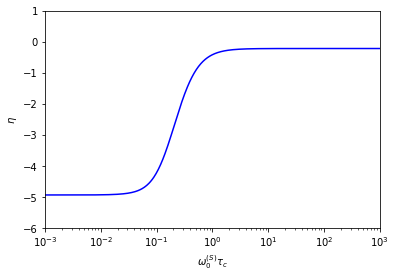

In [5]:
ax=plt.figure().add_subplot(111)
ax.semilogx(-omegaS*tauc,eta,color='blue')
ax.set_ylabel(r'$\eta$')
ax.set_xlim([1e3,1e-3])
ax.set_ylim([-6,1])
ax.invert_xaxis()
ax.set_xlabel(r'$\omega_0^{(S)}\tau_c$')